In [1]:
import sys
sys.path.append('..')

import torch
from opencv_transforms import transforms as v2
from src.datasets.anomaly_dataset import AnomalyDataset

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from src.config import DATA_FOLDER

BASE_PATH = Path("..")
data_path = BASE_PATH.joinpath(DATA_FOLDER)
tdd_path = data_path / "MVTecAD" / "hazelnut"

In [2]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image  

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)
        
        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy())
        label = classes[np.argmax(labels[i])]
        ax.set_title(label)
        ax.axis('off')

In [3]:
# load data files
train_npy = np.load(tdd_path / "train.npz")
X_train, y_train = train_npy['x'], train_npy['y']

/home/ubuntu/Desktop/One-Class-Classification-Anomaly-Detection/venv/lib/python3.11/site-packages/opencv_transforms/functional.py:63: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1)))


Shape of X [N, C, H, W]: torch.Size([64, 3, 224, 224])
Shape of y: torch.Size([64]) torch.float64


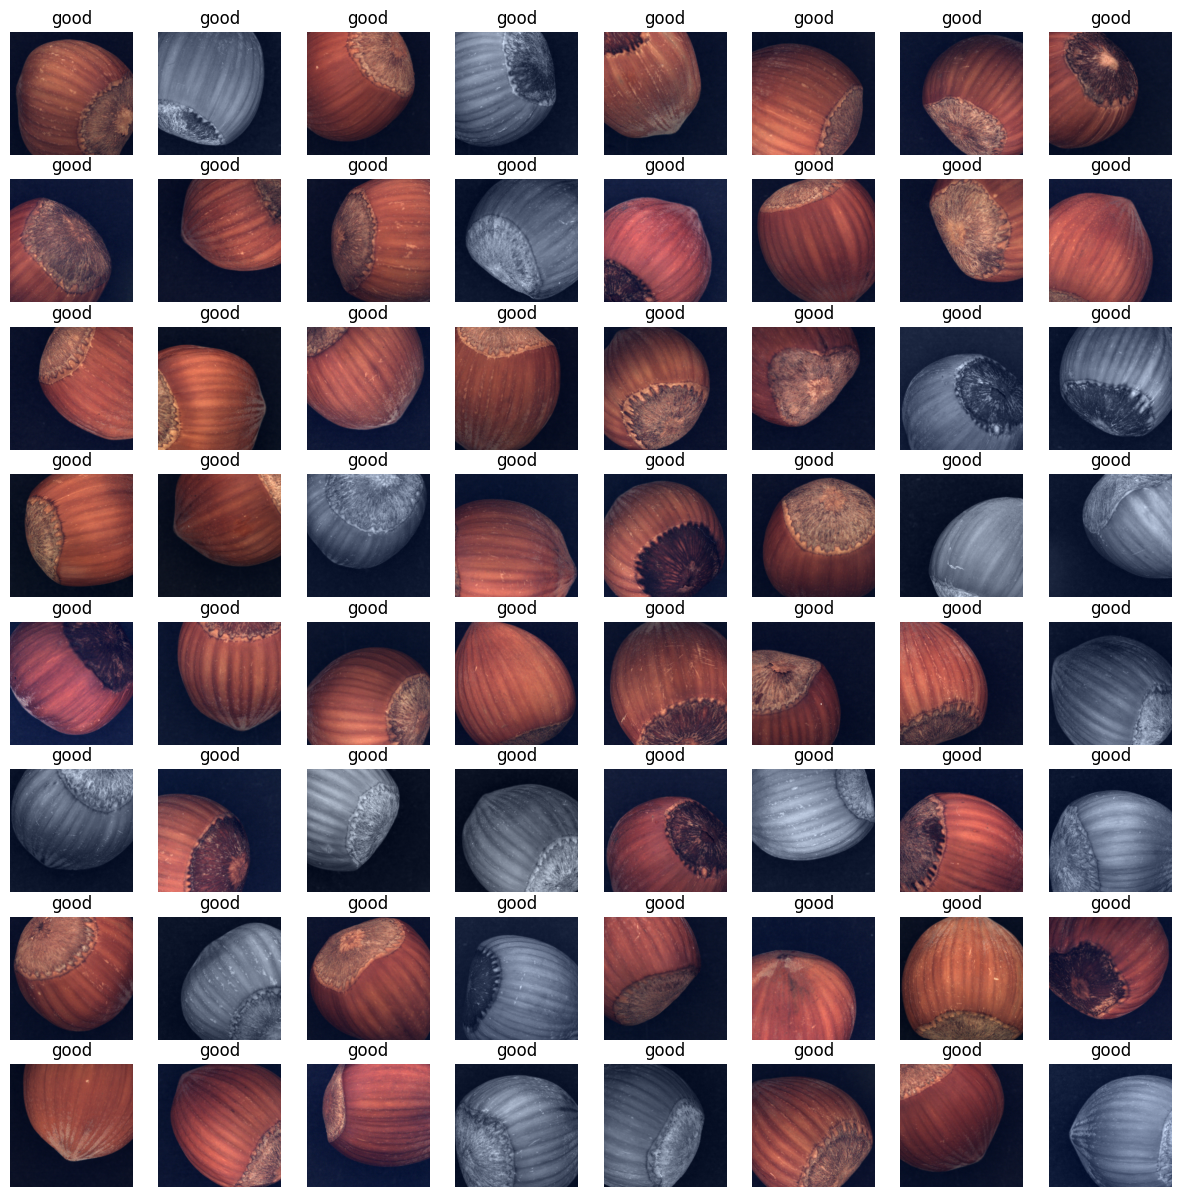

In [4]:
transforms = v2.Compose([
  v2.Resize(360),
  v2.RandomCrop(224),
  v2.RandomVerticalFlip(p=0.5),
  v2.RandomHorizontalFlip(p=0.5),
  v2.RandomGrayscale(p=0.2),
  v2.ToTensor(),
  v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data = AnomalyDataset(y_train, X_train, transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"Shape of X [N, C, H, W]: {images.shape}")
print(f"Shape of y: {labels.shape} {labels.dtype}")

classes = ['good']
plot_images(images, labels, classes)